In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.stats import chi2_contingency



## EDA and Data Pre-processing

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
#show the total number of nulls for each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def impute_median(series):
    return series.fillna(series.median())

In [7]:
#Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [8]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

# replace agent and company with have and dont have

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [10]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

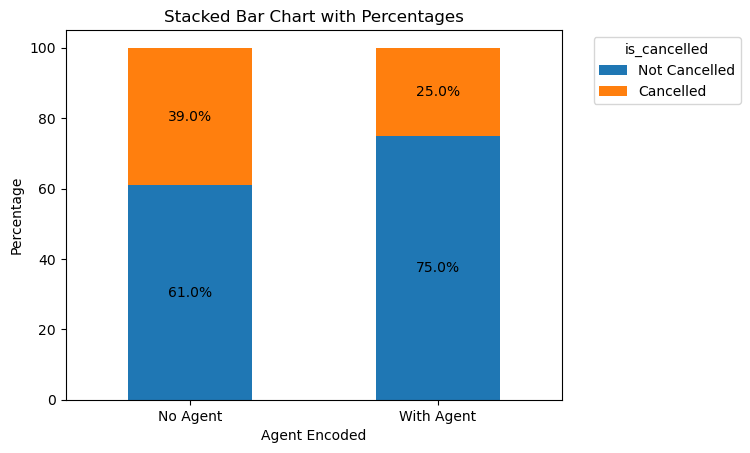

In [11]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [12]:
df['company_encoded'] = df['company'].isnull().astype(int)

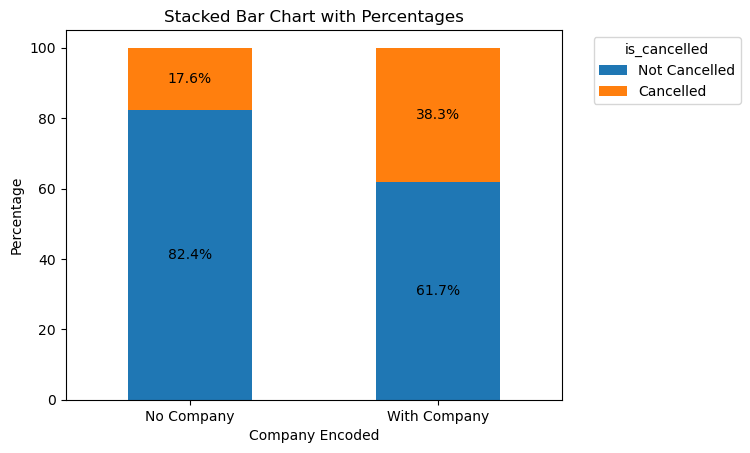

In [13]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

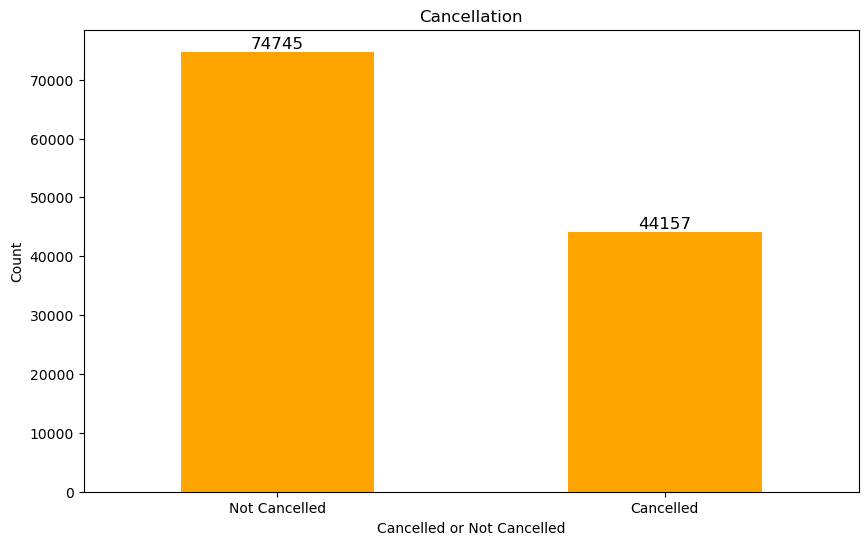

In [14]:
# Count the values
value_counts = df["is_canceled"].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar', color='orange')
plt.xlabel('Cancelled or Not Cancelled')
plt.ylabel('Count')
plt.title('Cancellation')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Customize the x-axis tick labels
labels = ['Not Cancelled', 'Cancelled']
ax.set_xticklabels(labels)

# Annotate the bars with their respective counts
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_14244\2614295107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


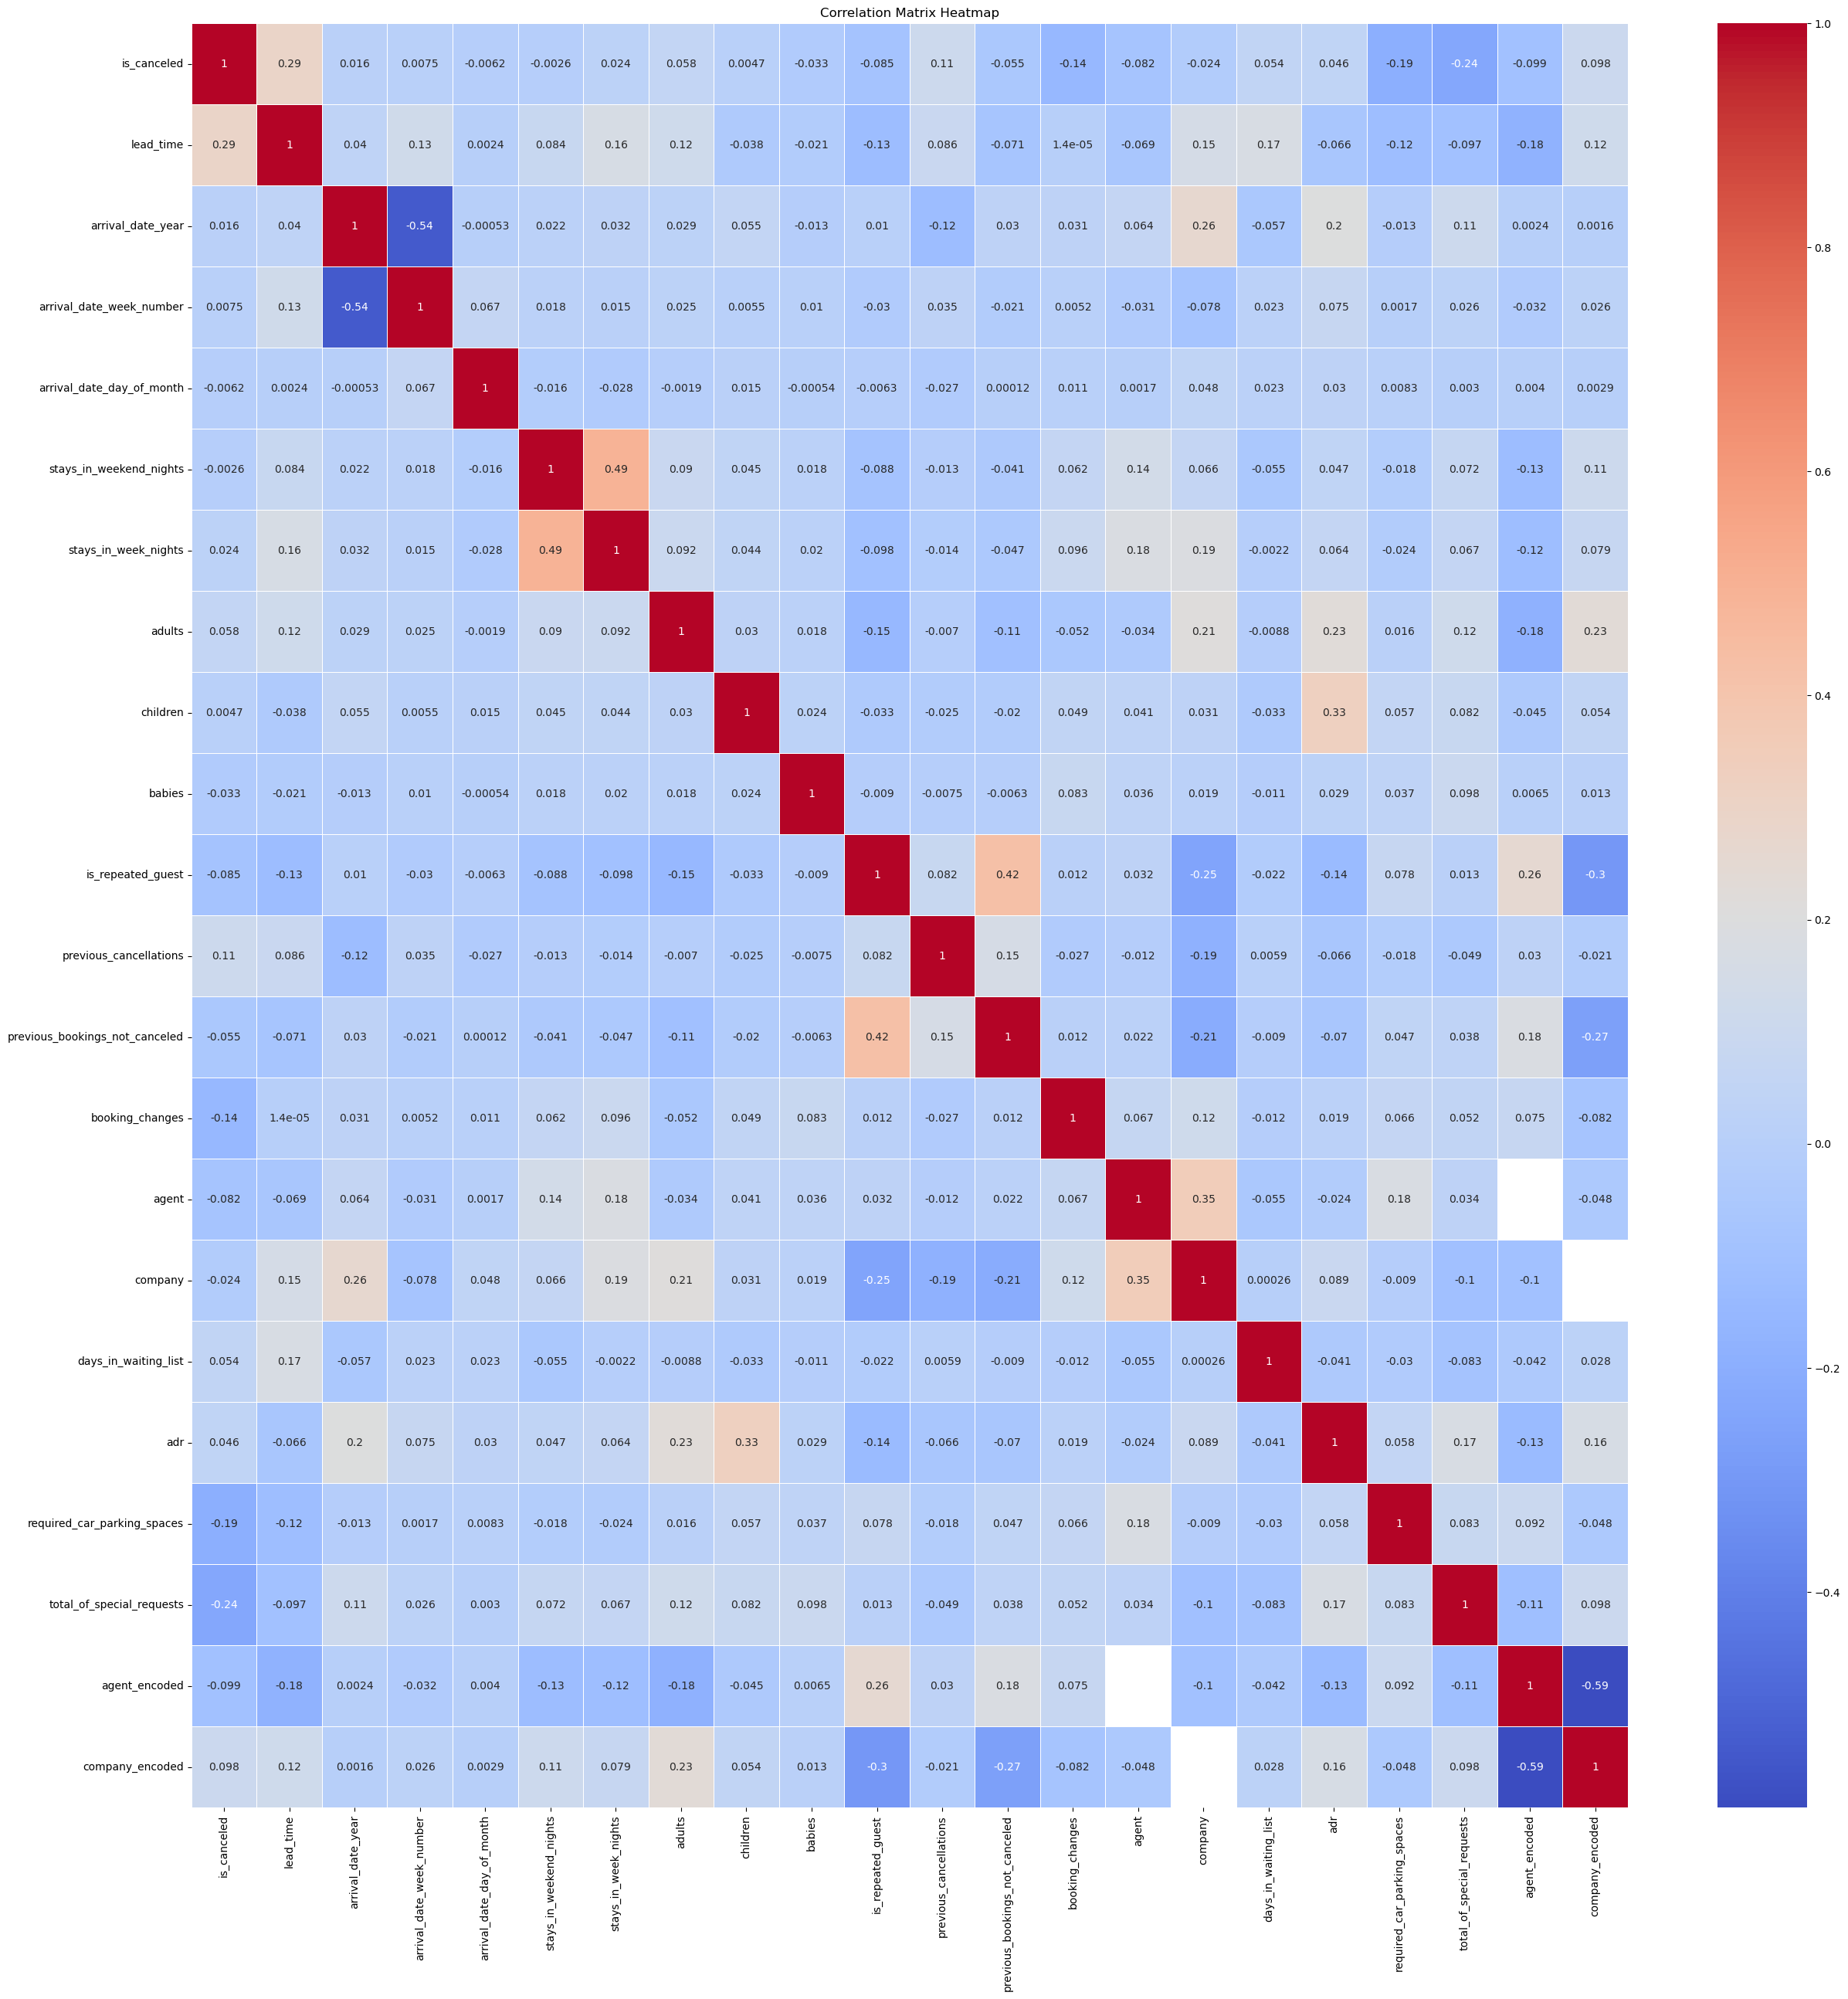

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
#correlation between is_canceled against other numeric attributes
is_cancelled_correlation = correlation_matrix['is_canceled']
sorted_correlations = is_cancelled_correlation.sort_values(ascending=False, key=abs)
sorted_correlations

is_canceled                       1.000000
lead_time                         0.291940
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
previous_cancellations            0.109914
agent_encoded                    -0.099457
company_encoded                   0.098028
is_repeated_guest                -0.085185
agent                            -0.081954
adults                            0.058408
previous_bookings_not_canceled   -0.055495
days_in_waiting_list              0.054008
adr                               0.046133
babies                           -0.032523
company                          -0.024385
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
children                          0.004740
stays_in_weekend_nights          -0.002639
Name: is_canceled, dtype: float64

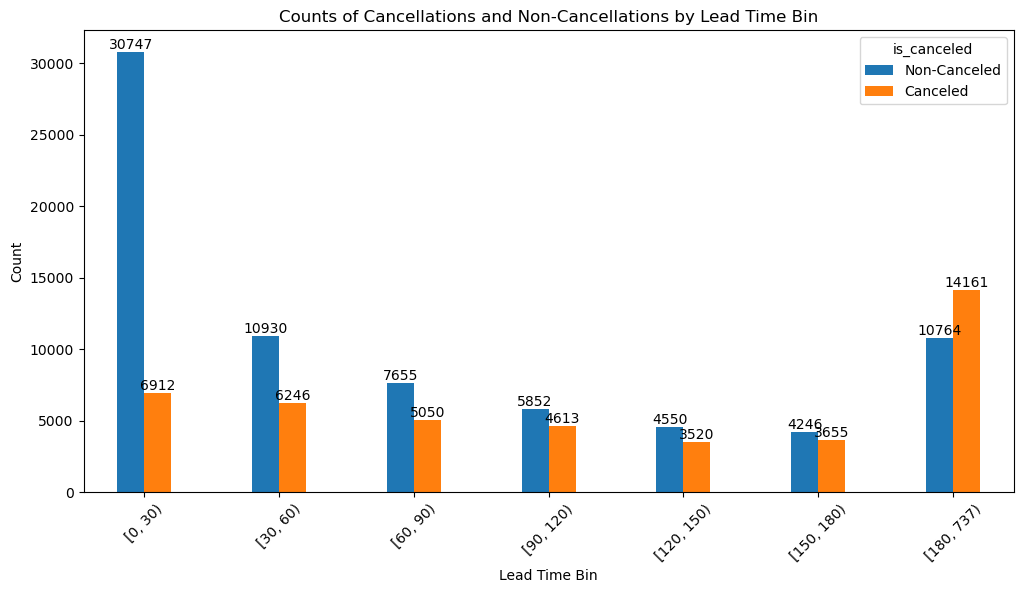

In [17]:
# Define lead time bins
lead_time_bins = [0, 30, 60, 90, 120, 150, 180, 737]

# Create a new column to categorize lead times into bins
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=lead_time_bins, right=False)

# Group the data by lead time bins and is_canceled, and count the occurrences
cancellation_counts = df.groupby(['lead_time_bin', 'is_canceled']).size().unstack(fill_value=0)

# Create a bar chart to visualize the counts of cancellations and non-cancellations in each lead time bin
ax = cancellation_counts.plot(kind='bar', figsize=(12, 6), width=0.4)

# Customize the plot
plt.xlabel('Lead Time Bin')
plt.ylabel('Count')
plt.title('Counts of Cancellations and Non-Cancellations by Lead Time Bin')
plt.xticks(rotation=45)
plt.legend(title='is_canceled', labels=['Non-Canceled', 'Canceled'], loc='upper right')

# Annotate the bars with counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center', va='bottom')

plt.show()

In [18]:
# from this graph you can see that as lead time increases, the proportion of cancelled booking increases

In [21]:
# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table
print(results_df)

C:\Users\adria\AppData\Local\Temp\ipykernel_14244\1249771497.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_14244\1249771497.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_14244\1249771497.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipyker

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

C:\Users\adria\AppData\Local\Temp\ipykernel_14244\1249771497.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)


In [20]:
#From this graph, we can observe a trend and see that generally, the number of cancelled booking is lower than the number of non-cancelled booking. 
#However, we can also observe that for certain period of time, there is a sharp increase in cancelled booking, which makes the number of cancelled booking higher than the number of non-cancelled booking.

## Feedforward Neural Network (FNN)

Create a FNN model without hyperparameter tuning

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

In [23]:
# Define the feature columns (x) and the target column (y)
X = df[['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'company_encoded', 'agent_encoded', 'arrival_date_week_number']]
y = df['is_canceled']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type','country'])

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize continuous features (e.g., lead_time)
scaler = StandardScaler()
X_train[['lead_time', 'arrival_date_week_number']] = scaler.fit_transform(X_train[['lead_time', 'arrival_date_week_number']])
X_test[['lead_time', 'arrival_date_week_number']] = scaler.transform(X_test[['lead_time', 'arrival_date_week_number']])

# Create the FNN model
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
model.add(keras.layers.Dense(64, activation='relu'))  # Hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate the accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}, Test Precision: {precision}, Test Recall: {recall}")
print(classification_report(y_test, y_pred))

Epoch 1/10
2973/2973 [==============================] - 3s 800us/step - loss: 0.4253 - accuracy: 0.7831 - precision: 0.7920 - recall: 0.5610
Epoch 2/10
2973/2973 [==============================] - 2s 807us/step - loss: 0.4038 - accuracy: 0.7915 - precision: 0.7853 - recall: 0.6008
Epoch 3/10
2973/2973 [==============================] - 2s 808us/step - loss: 0.3978 - accuracy: 0.7949 - precision: 0.7884 - recall: 0.6093
Epoch 4/10
2973/2973 [==============================] - 2s 814us/step - loss: 0.3946 - accuracy: 0.7961 - precision: 0.7886 - recall: 0.6133
Epoch 5/10
2973/2973 [==============================] - 2s 812us/step - loss: 0.3915 - accuracy: 0.7972 - precision: 0.7882 - recall: 0.6179
Epoch 6/10
2973/2973 [==============================] - 2s 814us/step - loss: 0.3892 - accuracy: 0.7983 - precision: 0.7891 - recall: 0.6207
Epoch 7/10
2973/2973 [==============================] - 3s 886us/step - loss: 0.3874 - accuracy: 0.7990 - precision: 0.7885 - recall: 0.6241
Epoch 8/10
29

## Hyperparameter Tuning for FNN

1. Create a custom HyperModel for Keras Tuner. This custom HyperModel will be used to define and tune the hyperparameters of the FNN.
2. Initialize the input shape and the number of classes for your FNN.
3. Tuning (hyperparameters to be tuned): 
   - The number of units (neurons) in the first hidden layer to be tuned, ranging from 32 to 512 with a step of 32. The ReLU activation function is used.
   - The number of additional hidden layers to be tuned by using a loop. Each hidden layer can have a different number of units, and the number of hidden layers can vary from 0 to 3.
   - The learning rate for the optimizer to be tuned, allowing choices of 1e-2, 1e-3, or 1e-4.

In [27]:
from kerastuner import HyperModel, HyperParameters

class FNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Input(shape=self.input_shape))

        # Tune the number of units in the first hidden layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu'))

        hp_units_hidden_list = []
        # Tune to Add more hidden layers if needed
        for i in range(hp.Int('num_hidden_layers', min_value=0, max_value=3)):
            hp_units_hidden = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
            hp_units_hidden_list.append(hp_units_hidden)
            model.add(keras.layers.Dense(units=hp_units, activation='relu'))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.add(keras.layers.Dense(units=self.num_classes, activation='sigmoid'))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy', Precision(), Recall()]
        )

        return model


1. Define an objective for the tuner. Using "val_precision" as the objective metric, and specify to maximize this metric ("direction" is set to "max").
2. This means that the tuner will search for hyperparameters that result in the highest validation precision.
3. Use RandomSearch with 20 max_trials
4. Store and save tuning data
    - Set a directory where the tuner will store its results, checkpoints, and configurations, named 'hyperparameter_tuning'.    - Set tThe name of the tuning project, named 'hotel_cancellation'.    - Set overwrite to True which t will overwrite the results of a previous tuning run with the same project name.

In [28]:
from kerastuner.tuners import RandomSearch
from kerastuner import Objective

objective_val = Objective("val_precision", direction="max")

tuner = RandomSearch(
    FNNHyperModel(input_shape=X_train.shape[1], num_classes=1),
    objective= objective_val,
    max_trials=20,  # The number of hyperparameter combinations to try
    seed = 0,
    directory='hyperparameter_tuning',  # Directory to store results
    project_name='hotel_cancellation',  # Name of the tuning project
    overwrite = True
)

Conduct HyperParameter Tuning

In [29]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 20 Complete [00h 00m 40s]
val_precision: 0.8481821417808533

Best val_precision So Far: 0.9289315938949585
Total elapsed time: 00h 21m 33s


Specify best model and get the best hyperparameters

In [30]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]


In [32]:
# Print the specific hyperparameters
print("Best Hyperparameters:")
print(f"Units in First Hidden Layer: {best_hyperparameters.get('units')}")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_hidden_layers')}")
print(f"Units for each Hidden Layers: {best_hyperparameters['units_0']}")  # Access the first unit
for i in range(1, best_hyperparameters['num_hidden_layers']):
    print(f"Units for each Hidden Layers: {best_hyperparameters[f'units_{i}']}")  # Access additional units
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

Best Hyperparameters:
Units in First Hidden Layer: 224
Number of Hidden Layers: 3
Units for each Hidden Layers: 96
Units for each Hidden Layers: 224
Units for each Hidden Layers: 512
Learning Rate: 0.01


In [33]:
best_model.evaluate(X_test, y_test)


744/744 [==============================] - 1s 865us/step - loss: 0.4204 - accuracy: 0.7733 - precision: 0.9289 - recall: 0.4316


[0.42037346959114075,
 0.7733064293861389,
 0.9289315938949585,
 0.43161535263061523]

Final results of FNN after hyperparameter tuning

In [34]:
# Get model predictions on the test data
y_pred_best = (best_model.predict(X_test) > 0.5).astype(int)  # Convert predicted probabilities to binary predictions

# Generate a classification report
class_report = classification_report(y_test, y_pred_best)

# Print the classification report
print(class_report)

744/744 [==============================] - 1s 785us/step
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     14817
           1       0.93      0.43      0.59      8964

    accuracy                           0.77     23781
   macro avg       0.83      0.71      0.72     23781
weighted avg       0.81      0.77      0.75     23781



# Ensemble Method

In [35]:
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## TOP 3 MODELS (SVC, XGBOOST, FNN)
1. Create SVC model, named model1, with the best hyperparameters obtained from hyperparamter tuning (kernel='rbf', C=0.11385953381489414, gamma=7.126995609048578)
2. Create XGBoost model, named model2, with the best hyperparameters obtained from hyperparamter tuning (learning_rate=0.22664403099102204, max_depth=3, n_estimators=119, objective='binary:logistic', subsample=0.32687862033868986)
3. Create FNN model, named model3, with the best hyperparameters obtained from hyperparameter tuning (units in first hidden layer: 416, nNumber o hHiddenlLayers: , l
Learni_r Rate: 0.)01

In [36]:
model1 = SVC(kernel='rbf', C=0.1, gamma=100)
model2 = xgb.XGBClassifier(learning_rate=0.22664403099102204, max_depth=3, n_estimators=119, objective='binary:logistic', subsample=0.32687862033868986)

In [37]:
model1

SVC(C=0.1, gamma=100)

In [38]:
model2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22664403099102204,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=119, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
def create_keras_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Set the number of units in the first hidden layer to 320
    model.add(Dense(224, activation='relu'))  # First hidden layer
    model.add(Dense(96, activation='relu')) # Add additional hidden layers (3 as per hyperparameter tuning)
    model.add(Dense(224, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])  # Set the learning rate to 0.01
    return model

# Create the KerasClassifier with the modified create_keras_model function and other hyperparameters
model3 = KerasClassifier(build_fn=create_keras_model, epochs=10, batch_size=32)



Place the 3 models into a voting emsemble, and evaluate result

In [40]:
voting_clf = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('rf', model3)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the other performance metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\adria\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
2973/2973 [==============================] - 5s 1ms/step - loss: 0.4229 - accuracy: 0.7825
Epoch 2/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.4082 - accuracy: 0.7920
Epoch 3/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3991 - accuracy: 0.7943
Epoch 4/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.4032 - accuracy: 0.7958
Epoch 5/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3915 - accuracy: 0.7986
Epoch 6/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3917 - accuracy: 0.7984
Epoch 7/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3958 - accuracy: 0.7966
Epoch 8/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3921 - accuracy: 0.8007
Epoch 9/10
2973/2973 [==============================] - 4s 1ms/step - loss: 0.3839 - accuracy: 0.8022
Epoch 10/10
744/744 [==============================] - 1s 768us/step
Accuracy: 0.8

In [41]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

AUC Score: 0.7665881970662339


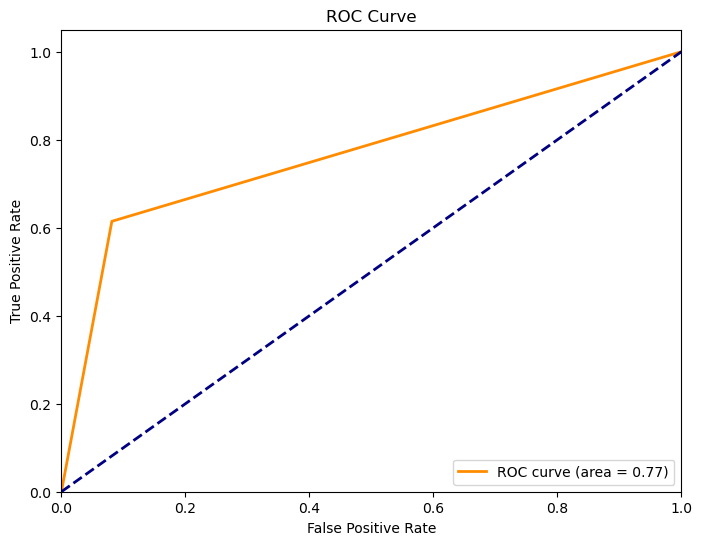

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()